In [3]:
import pickle
import torch
import numpy as np
import random
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys, os
sys.path.append("../..")

from models.classic import Modular
from sklearn.metrics import f1_score, recall_score, precision_score


def set_seed(seed_value=1763):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def draw_confusion_matrix(y_true, y_pred, counts=False, figsize=(6,6)):
    cf_matrix = confusion_matrix(y_true, y_pred)

    group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    groups = ["True Negative","False Positive","False Negative","True Positive"]

    if counts:
        labels = [f"{y}\n{x}\n{z}" for x,y,z in zip(group_percentages, groups, group_counts)]
    else:
        labels = [f"{y}\n{x}" for x,y in zip(group_percentages, groups)]
    labels = np.asarray(labels).reshape(2,2)

    f, ax = plt.subplots(1,1, figsize=figsize)
    ax = sns.heatmap(cf_matrix, annot=labels, ax=ax,
                fmt='', cbar=False, cmap='Blues',
                xticklabels=["benign", "malicious"],
                yticklabels=["benign", "malicious"])
    ax.set_ylabel("Ground truth label")
    ax.set_xlabel("Prediction")

def print_scores(y_true, y_pred):
    print("F1: ",f1_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("Accuracy: ", (y_true == y_pred).numpy().mean() * 100)

# Plotting losses and metrics

In [4]:
def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None,
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    [ax.plot(x) for x in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [5]:
train_loss = {}
val_loss = {}
train_metrics = {}
val_metrics = {}
duration = {}

prefix = "ffnn128"
val_loss[prefix] = get_content(f"{prefix}-val_losses")
train_loss[prefix] = get_content(f"{prefix}-train_losses")
val_metrics[prefix] = get_content(f"{prefix}-val_metrics")
train_metrics[prefix] = get_content(f"{prefix}-train_metrics")
duration[prefix] = get_content(f"{prefix}-duration")

prefix = "ffnn256_128"
val_loss[prefix] = get_content(f"{prefix}-val_losses")
train_loss[prefix] = get_content(f"{prefix}-train_losses")
val_metrics[prefix] = get_content(f"{prefix}-val_metrics")
train_metrics[prefix] = get_content(f"{prefix}-train_metrics")
duration[prefix] = get_content(f"{prefix}-duration")

prefix = "ffnn512_256_128"
val_loss[prefix] = get_content(f"{prefix}-val_losses")
train_loss[prefix] = get_content(f"{prefix}-train_losses")
val_metrics[prefix] = get_content(f"{prefix}-val_metrics")
train_metrics[prefix] = get_content(f"{prefix}-train_metrics")
duration[prefix] = get_content(f"{prefix}-duration")

prefix = "ffnn1024_512_256_128"
val_loss[prefix] = get_content(f"{prefix}-val_losses")
train_loss[prefix] = get_content(f"{prefix}-train_losses")
val_metrics[prefix] = get_content(f"{prefix}-val_metrics")
train_metrics[prefix] = get_content(f"{prefix}-train_metrics")
duration[prefix] = get_content(f"{prefix}-duration")

Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fTrue-ffnn128-val_losses.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fTrue-ffnn128-train_losses.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fTrue-ffnn128-val_metrics.npy']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fTrue-ffnn128-train_metrics.npy']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fTrue-ffnn128-duration.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fTrue-ffnn256_128-val_losses.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_fTrue-ffnn256_128-train_losses.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2re

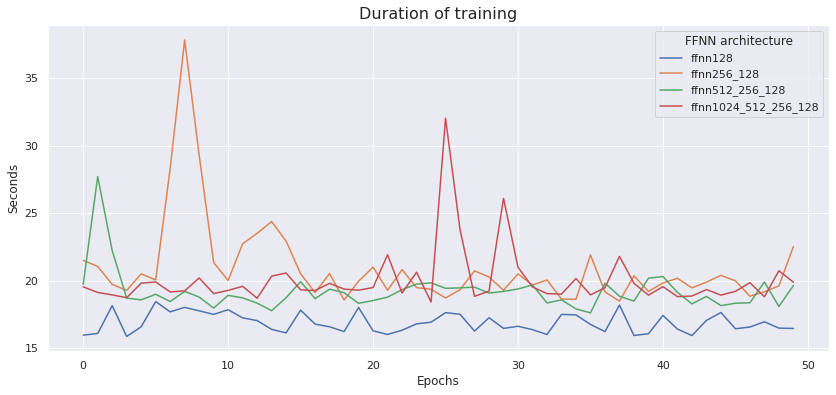

In [11]:
ax = plot_lists([duration[x] for x in duration.keys()], 
                legend_title="FFNN architecture",
                legend=list(duration.keys()))
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Seconds")

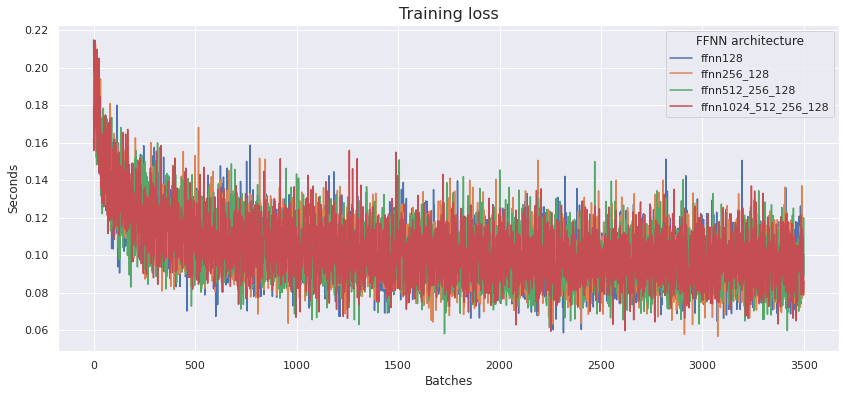

In [17]:
ax = plot_lists([train_loss[x][50:] for x in train_loss.keys()], 
                legend_title="FFNN architecture",
                legend=list(train_loss.keys()))
ax.set_title("Training loss", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

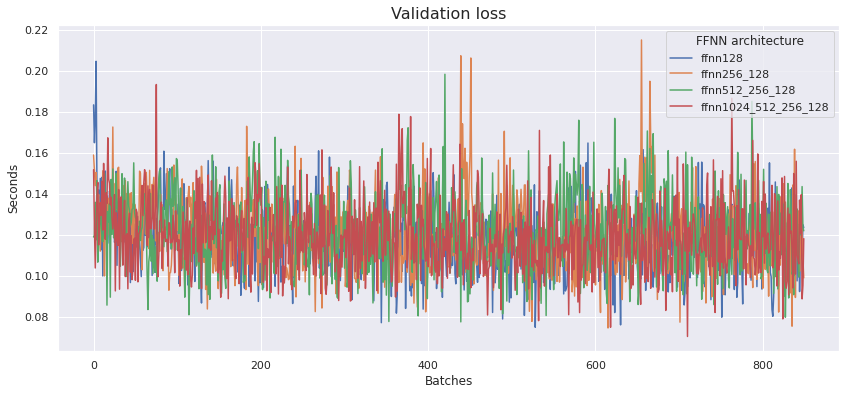

In [18]:
ax = plot_lists([val_loss[x][50:] for x in val_loss.keys()], 
                legend_title="FFNN architecture",
                legend=list(val_loss.keys()))
ax.set_title("Validation loss", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

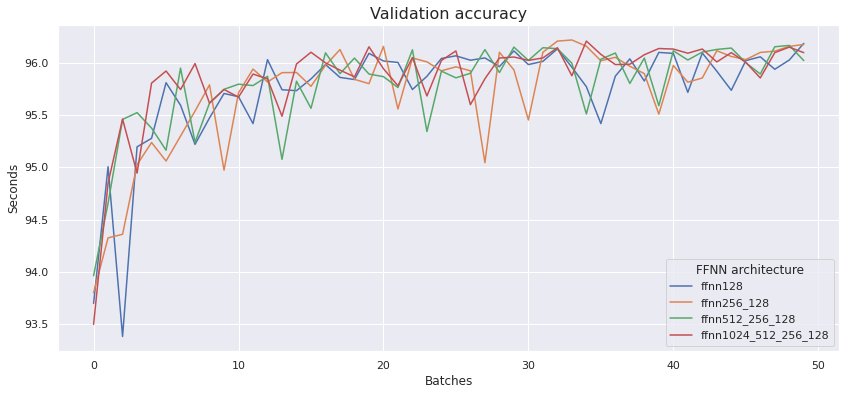

In [20]:
ax = plot_lists([val_metrics[x][:,0] for x in val_metrics.keys()], 
                legend_title="FFNN architecture",
                legend=list(val_metrics.keys()))
ax.set_title("Validation accuracy", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

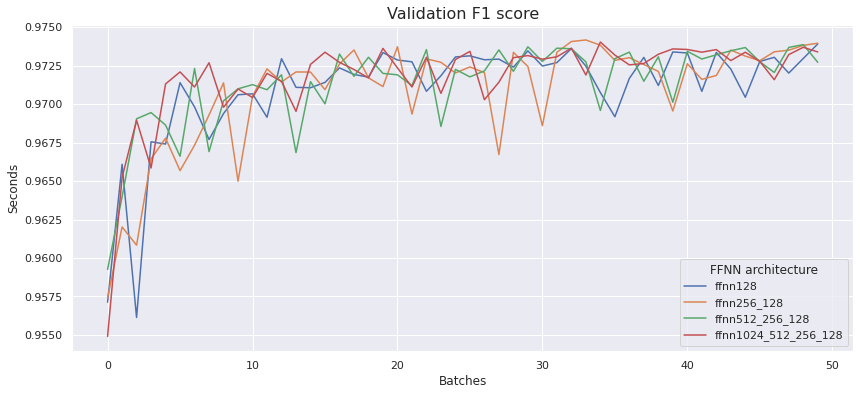

In [22]:
ax = plot_lists([val_metrics[x][:,1] for x in val_metrics.keys()], 
                legend_title="FFNN architecture",
                legend=list(val_metrics.keys()))
ax.set_title("Validation F1 score", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

In [29]:
import pandas as pd
df = pd.DataFrame([val_metrics[x][:,1] for x in val_metrics.keys()],
                index=val_metrics.keys())
df[list(range(40,49))].mean(axis=1)

ffnn128                 0.972346
ffnn256_128             0.972928
ffnn512_256_128         0.973240
ffnn1024_512_256_128    0.973115
dtype: float64